In [170]:
import numpy as np
import matplotlib.pyplot as plt

Matricea este unitara: True


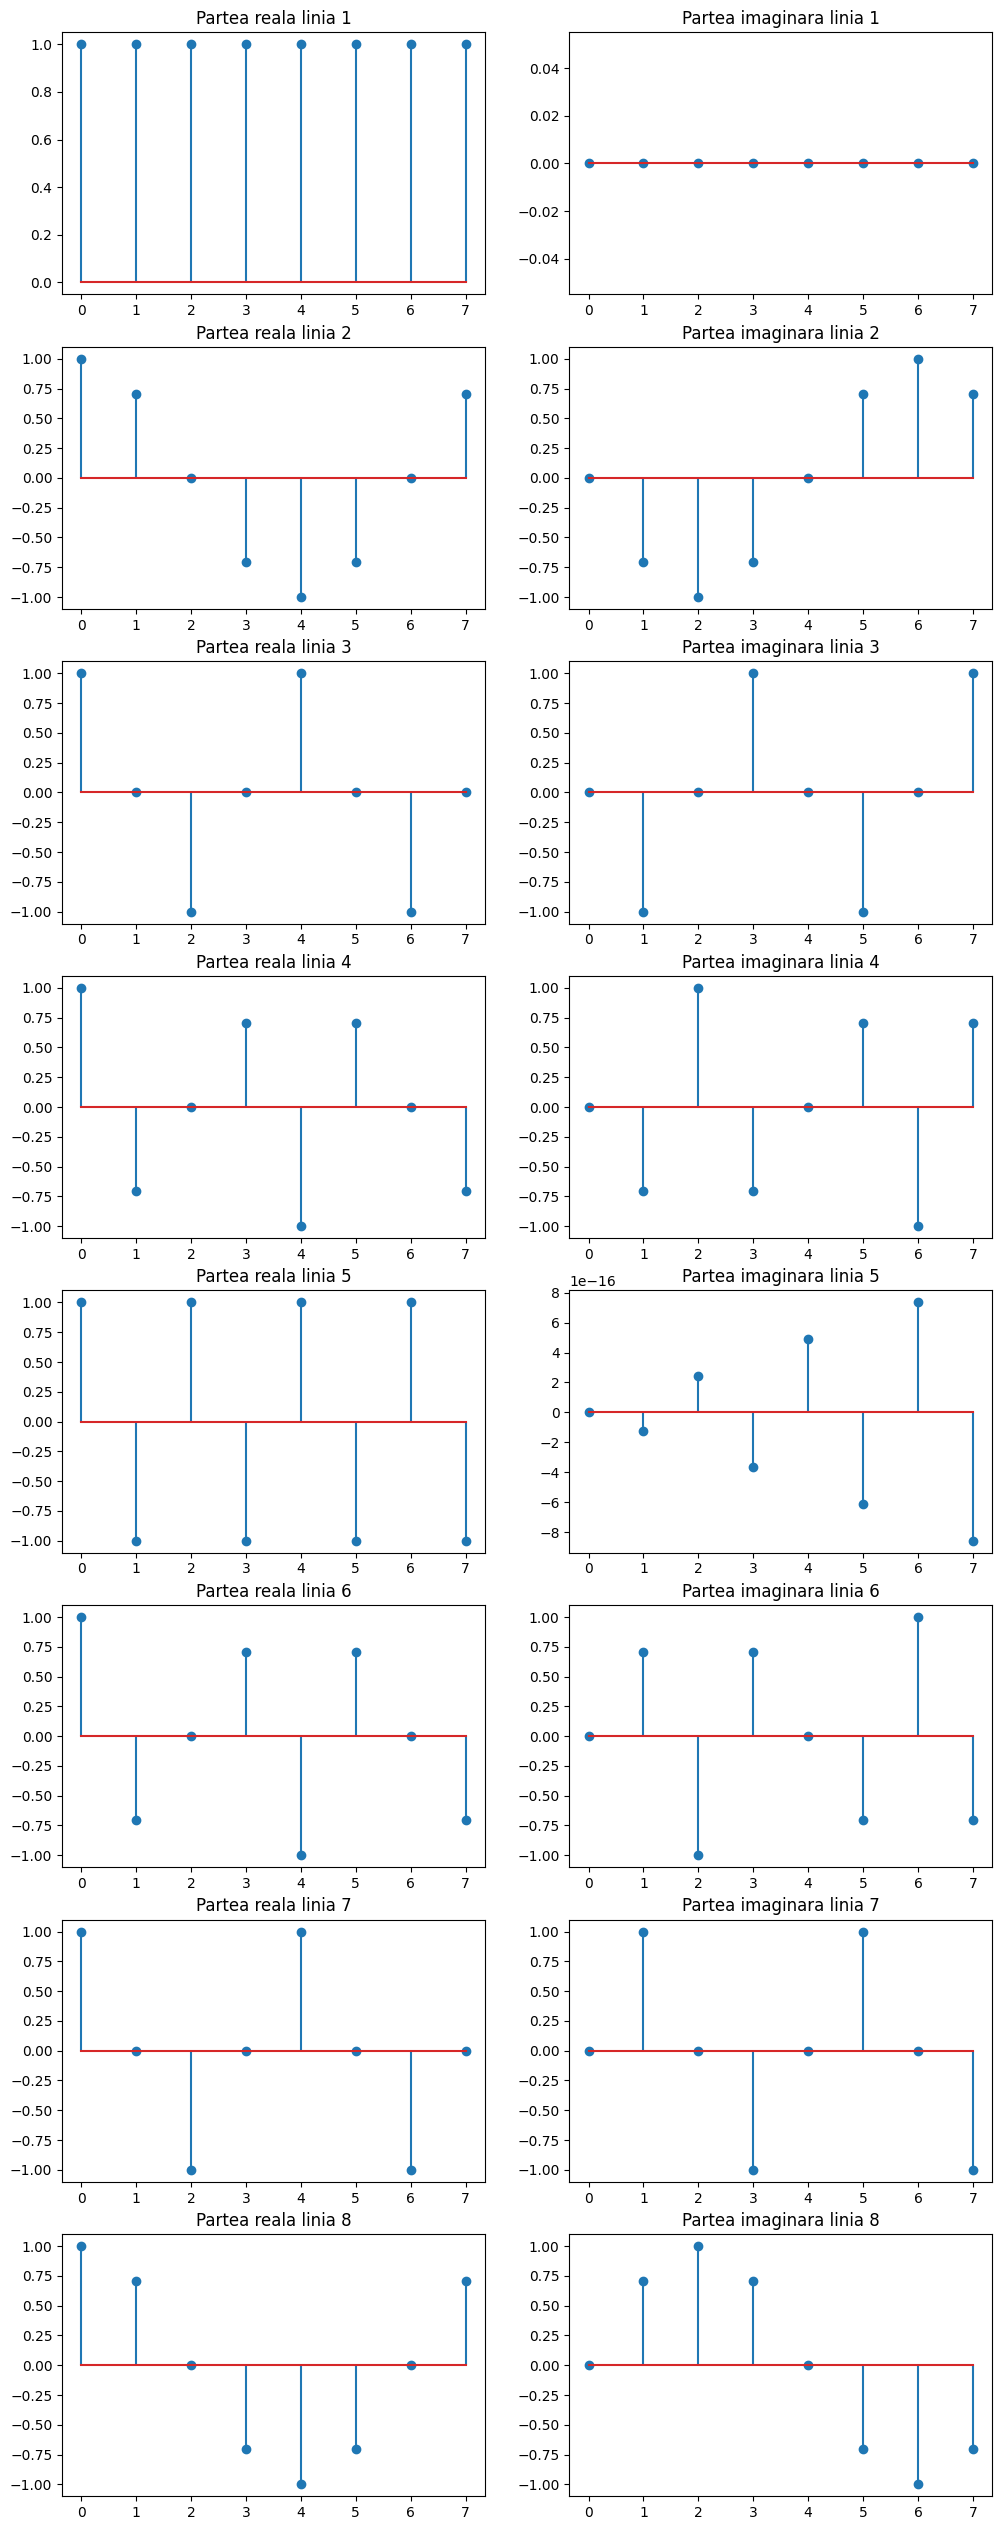

In [171]:
F = np.zeros((8,8), dtype=complex)

for i in range(8):
    for k in range(8):
        F[i,k]= np.exp(-2j * np.pi * i * k/8)

fig, axs = plt.subplots(8, 2, figsize=(12, 4*8))

for i in range(8):
    axs[i, 0].stem(range(8), F[i, :].real)
    axs[i, 0].set_title(f"Partea reala linia {i+1}")
    axs[i, 1].stem(range(8), F[i, :].imag)
    axs[i, 1].set_title(f"Partea imaginara linia {i+1}")

F_transpose = np.conjugate(F.T)
I = np.dot(F_transpose, F)

difference_matrix = I - 8 * np.eye(8)

norm_difference = np.linalg.norm(np.abs(difference_matrix))
tolerance = 1e-6  
is_unitary = norm_difference < tolerance

print("Matricea este unitara:", is_unitary)

In [172]:
def plot_colored(ax, points, x_axis, y_axis, distances, cmap):
    for i in range(len(points) - 1):
        ax.plot(x_axis[i:i+2], y_axis[i:i+2], color=plt.get_cmap(cmap)(distances[i] / distances.max()))

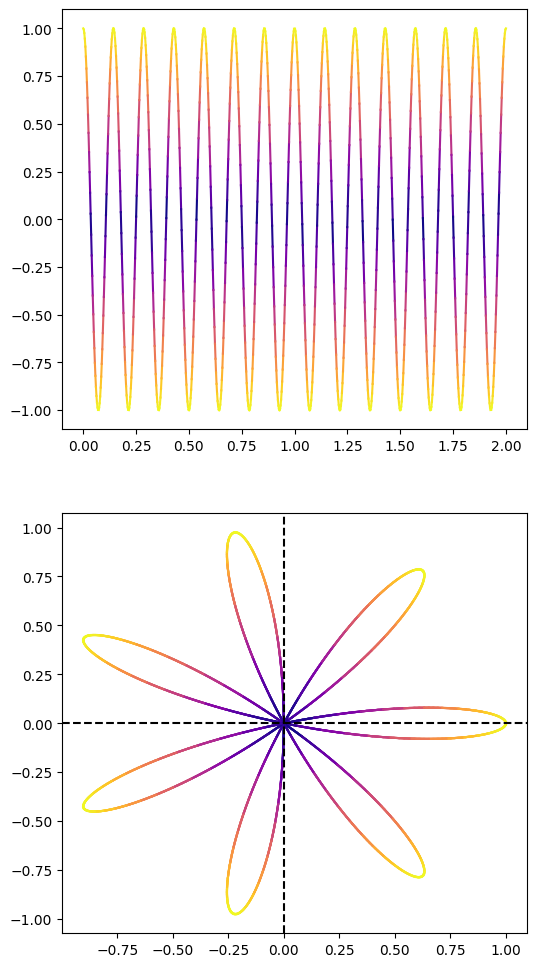

In [173]:
omega = 7
t = np.linspace(0, 2, 800)
x = np.sin(2 * np.pi * omega * t + np.pi/2)

y = x * np.exp(-2j * np.pi * t) 

fig, ax = plt.subplots(2,1,figsize=(6,12))

plot_colored(ax[0], t, t, x, np.abs(x- np.mean(x)), cmap='plasma')

plot_colored(ax[1], t, y.real, y.imag, np.abs(y), cmap='plasma')
ax[1].axhline(0, color='black', linestyle='--')
ax[1].axvline(0, color='black', linestyle='--')

plt.show()

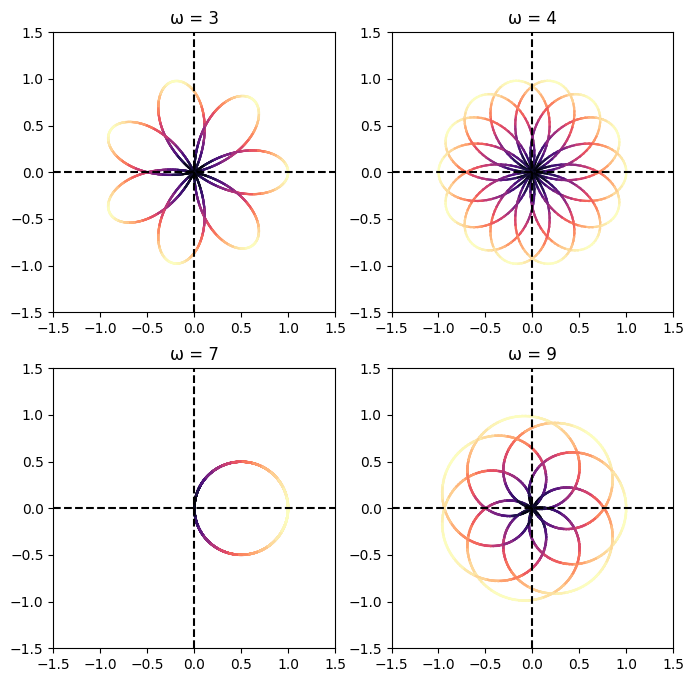

In [174]:
omegas = [3,4,7,9]

zs = [x * np.exp(-2j * np.pi * omega * t) for omega in omegas]

fig, axs = plt.subplots(2, 2, figsize=(8,8))
axs = axs.ravel()

for idx, z in enumerate(zs):
    plot_colored(axs[idx], t, z.real, z.imag, np.abs(zs[idx]), cmap='magma')
    axs[idx].set_title(f'ω = {omegas[idx]}')
    axs[idx].axhline(0, color='black', linestyle='--')
    axs[idx].axvline(0, color='black', linestyle='--')
    axs[idx].set_xlim([-1.5, 1.5])
    axs[idx].set_ylim([-1.5, 1.5])

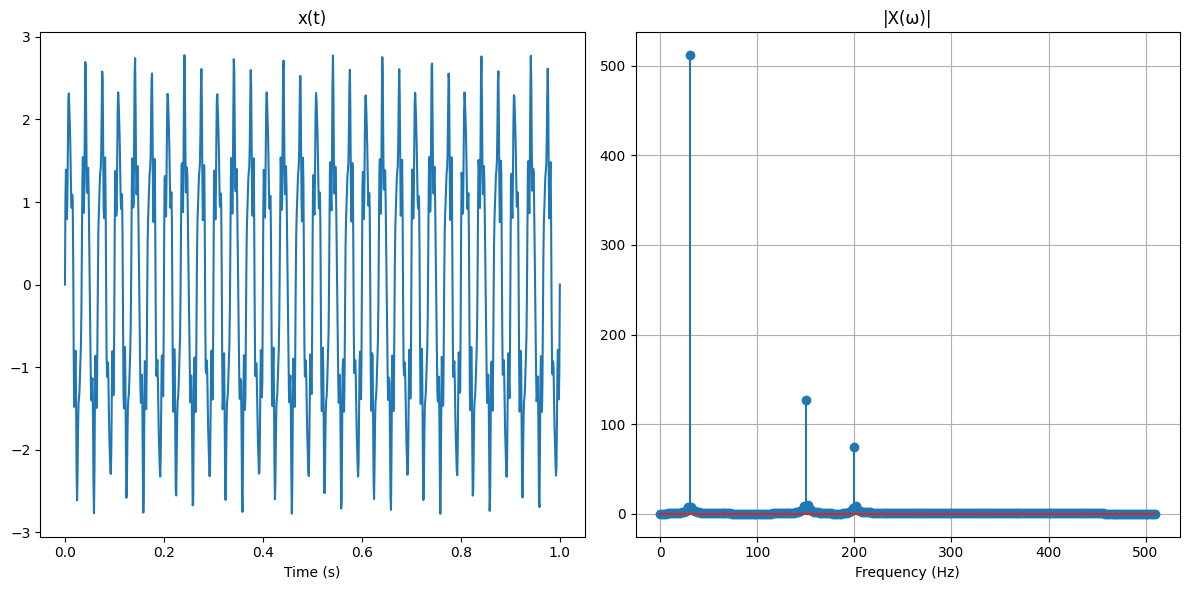

In [175]:
sampling_points = 1024
dft_n = 512
t = np.linspace(0, 1, sampling_points)

ampl = [2, 0.3, 0.5]
multiples = [15, 100, 75]
freq = [multiple * sampling_points/dft_n for multiple in multiples]

x = np.sum([ampl[i] * np.sin(f * 2.0 * np.pi * t) for i,f in enumerate(freq)], axis=0)

def dft(x, N):
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x[:N])
    return X

xf = dft(x, dft_n)

frequencies = [k * sampling_points / dft_n for k in range(dft_n)]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, x)
plt.title("x(t)")
plt.xlabel("Time (s)")

plt.subplot(1, 2, 2)
plt.stem(frequencies[:dft_n//2], np.abs(xf[:dft_n//2]))
plt.title("|X(ω)|")
plt.xlabel("Frequency (Hz)")
plt.grid()

plt.tight_layout()
plt.show()